# KELOMPOK 4
- Clarissa Beatrice Kosasih 2702209350
- Jeremy Djohar Riyadi 2702219572
- Kelvin Jonathan Yusach 2702209533
- Sherly Vaneza 2702222163

# NOMOR 1
## INTRO

Proses klaim asuransi perjalanan sering kali menghadirkan tantangan bagi perusahaan asuransi karena volume klaim yang tinggi dan berbagai faktor yang memengaruhinya, yang dapat menyebabkan pengambilan keputusan menjadi lebih lambat dan meningkatkan risiko kesalahan. Di sisi lain, pelanggan mengharapkan proses yang cepat dan akurat. Dalam konteks ini, penerapan Machine Learning (ML) menjadi sangat mendesak karena ML mampu menganalisis data historis dalam jumlah besar secara cepat dan akurat untuk memprediksi hasil klaim.  

ML memungkinkan perusahaan asuransi untuk:  
- **Mempercepat proses klaim:** Keputusan otomatis dapat mengurangi waktu tunggu pelanggan secara signifikan.  
- **Mengurangi kesalahan manusia:** Dengan prediksi berbasis data, risiko kesalahan manual berkurang, terutama dalam kasus klaim yang kompleks.  
- **Meningkatkan efisiensi operasional:** Tim asuransi dapat fokus pada klaim yang lebih rumit, sementara klaim sederhana diproses secara otomatis.  

Impact dari implementasi ini meliputi peningkatan kepuasan pelanggan, efisiensi layanan yang lebih baik, dan penghematan biaya operasional perusahaan. Selain itu, perusahaan dapat memperkuat kepercayaan pelanggan dengan memberikan layanan yang lebih responsif dan andal.


## DESCRIPTION ABOUT THE DATASET
- Agency = Kode dari agensi perjalanan yang mengelola asuransi

- Agency Type = Jenis Agensi Perjalanan

- Distribution Channel = Cara produk dijual

- Product Name = Nama produk asuransi yang dijual

- Claim = Status klaim asuransi

- Duration = Durasi perjalanan dalam hari

- Destination = Negara yang ingin dituju

- Net Sales = Penjualan bersih asuransi

- Commision = Komisi yang diterima agen asuransi

- Gender = Jenis kelamin pemegang asuransi

- Age = Usia pemegang asuransi

## DATA PREPROCESSING & HANDLING MISSING VALUES



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # untuk interactive plot

In [ ]:
data = pd.read_csv('travel insurance.csv')
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


Code ini membaca CSV file dan mengubahnya kedalam pandas DataFrame dan menunjukan beberapa baris untuk melihat struktur isi dari dataset.

In [ ]:
# Melihat info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


Code ini memberikan ringkasan tentang dataset, termasuk jumlah total entri, jumlah nilai yang tidak kosong, tipe data dari setiap kolom, serta penggunaan memori.
Code ini bertujuan untuk memahami struktur dataset dan mendeteksi jika ada nilai yang hilang di kolom tertentu.

In [ ]:
# Menghitung missing value
data.isna().sum()

,0
Agency,0
Agency Type,0
Distribution Channel,0
Product Name,0
Claim,0
Duration,0
Destination,0
Net Sales,0
Commision (in value),0
Gender,45107


Tidak ada data yang hilang, kecuali di kolom gender sebanyak 45107 row. Karena banyaknya jumlah missing value, row dengan missing data akan di drop


In [ ]:
# Menghapus missing value di column Gender
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18219 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                18219 non-null  object 
 1   Agency Type           18219 non-null  object 
 2   Distribution Channel  18219 non-null  object 
 3   Product Name          18219 non-null  object 
 4   Claim                 18219 non-null  object 
 5   Duration              18219 non-null  int64  
 6   Destination           18219 non-null  object 
 7   Net Sales             18219 non-null  float64
 8   Commision (in value)  18219 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   18219 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


Code ini akan menghapus setiap baris yang memiliki data hilang/NA di kolom "Gender".

In [ ]:
data.describe()

,Duration,Net Sales,Commision (in value),Age
count,18219.000000,18219.000000,18219.000000,18219.000000
mean,68.708491,57.488890,18.480432,44.785444
std,112.977561,73.884899,24.963075,20.894323
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,22.000000,6.750000,31.000000
50%,21.000000,30.000000,9.750000,40.000000
75%,57.000000,54.500000,16.750000,52.000000
max,740.000000,810.000000,283.500000,118.000000


Setelah drop NA, rows pada data ini berjumlah 18219 row dan 11 column


In [ ]:
data.duplicated().sum()

1260

Code ini untuk menunjukkan jumlah data duplikat, dan duplikat dari data ini ada 1260

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

Code ini akan menghapus setiap data yang memiliki duplikat data.

## EDA

### NUMERICAL COLUMN

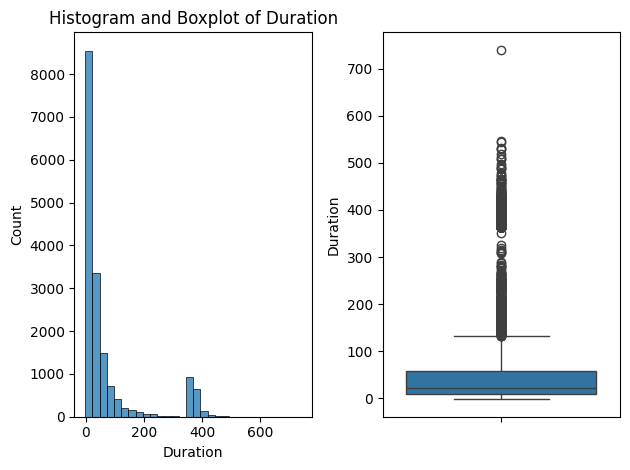

Skewness:  2.1734710577768332
Kurtosis:  3.293671068295808


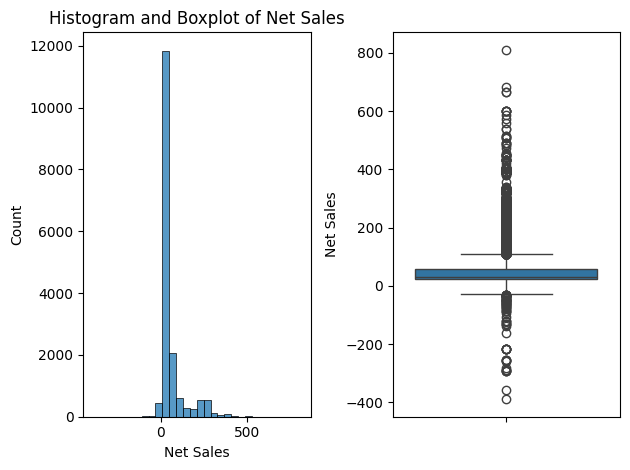

Skewness:  2.515640557196433
Kurtosis:  8.486079625793074


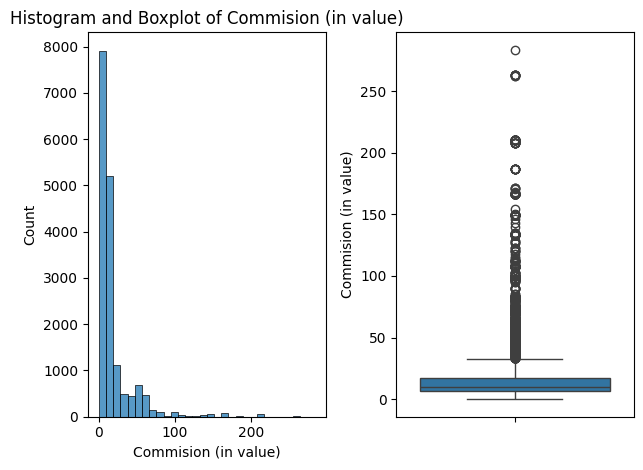

Skewness:  4.046534628395985
Kurtosis:  21.932355556666074


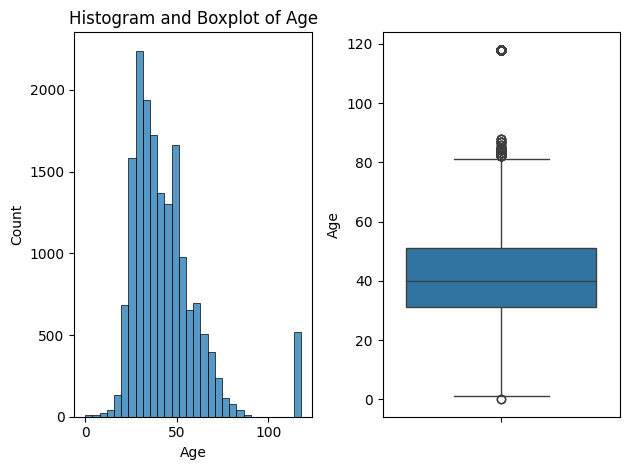

Skewness:  1.8815217094258108
Kurtosis:  5.0202621927505


In [ ]:
# Mengecek distribusi dan outlier di column numeric dengan menggunakan histogram dan boxplot

numerical_cols = data.select_dtypes(include=['number']).columns

for i in numerical_cols:
  plt.subplot(1,2,1)
  sns.histplot(data[i], bins = 30)
  plt.title(f"Histogram and Boxplot of {i}")

  plt.subplot(1,2,2)
  sns.boxplot(data[i])
  plt.tight_layout()
  plt.show()
  print("Skewness: ", data[i].skew())
  print("Kurtosis: ", data[i].kurt())

Code ini untuk melihat setiap outlier di kolom data yang numerik.

### DISTRIBUSI CATEGORICAL

In [ ]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
  print(data[col].value_counts())
  print("---------------------")

Agency
C2B    7782
JZI    5982
LWC     684
TST     498
RAB     438
JWT     424
KML     335
ART     320
CCR     177
CBH     101
TTW      94
CSR      86
ADM      33
CWT       5
Name: count, dtype: int64
---------------------
Agency Type
Airlines         14946
Travel Agency     2013
Name: count, dtype: int64
---------------------
Distribution Channel
Online     15994
Offline      965
Name: count, dtype: int64
---------------------
Product Name
Basic Plan                              5140
Bronze Plan                             3788
Silver Plan                             2180
Value Plan                              2013
Annual Silver Plan                      1277
Travel Cruise Protect                    497
Gold Plan                                349
Comprehensive Plan                       348
24 Protect                               239
Single Trip Travel Protect Gold          201
Annual Gold Plan                         188
Single Trip Travel Protect Silver        172
Premier Plan   

Code ini untuk melihat distribusi data masing masing kolom kategorial.


### BIVARIATE


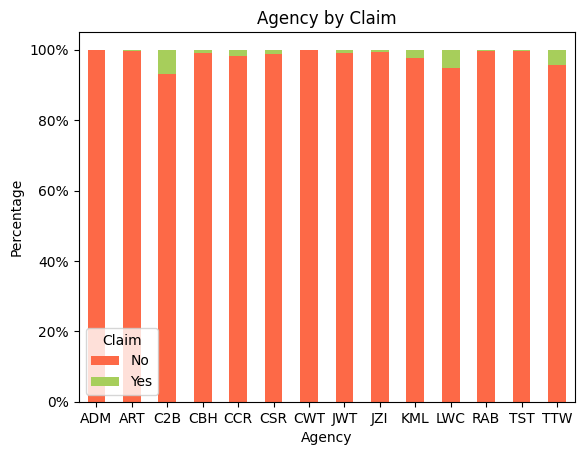

In [ ]:
# Agency dan Claim

# assign warna (hex code)
colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}

# group data
(data.groupby('Agency')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Agency by Claim')
plt.xlabel('Agency')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

Agency C2B dan LWC menghasilkan claim 'yes' paling banyak

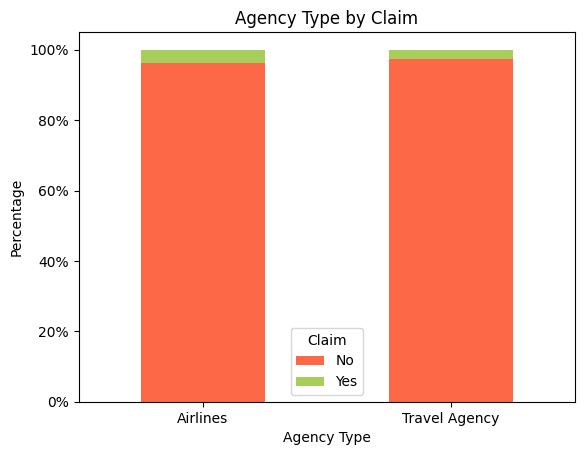

In [ ]:
# Agency Type dan Claim

# assign warna (hex code)
colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}

# group data
(data.groupby('Agency Type')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Agency Type by Claim')
plt.xlabel('Agency Type')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

Persentase claim 'yes' di Airlines dan Travel Agency tidak berbeda jauh. Jadi dapat dibilang bahwa agency type tidak banyak mempengaruhi claim

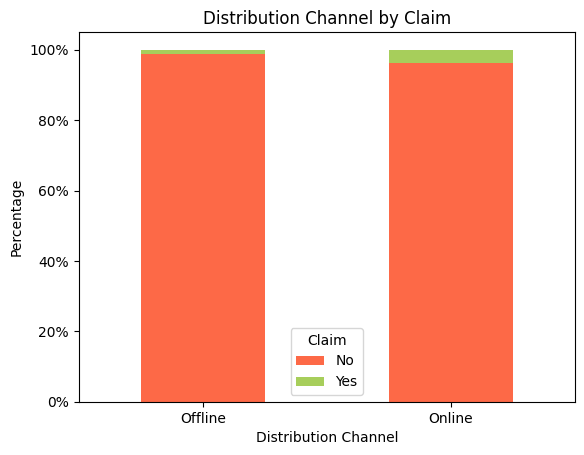

In [ ]:
# Distribution Channel dan Claim

# assign warna (hex code)
colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}

# group data
(data.groupby('Distribution Channel')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Distribution Channel by Claim')
plt.xlabel('Distribution Channel')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

Distribution channel online menghasilkan lebih banyak claim asuransi 'yes'

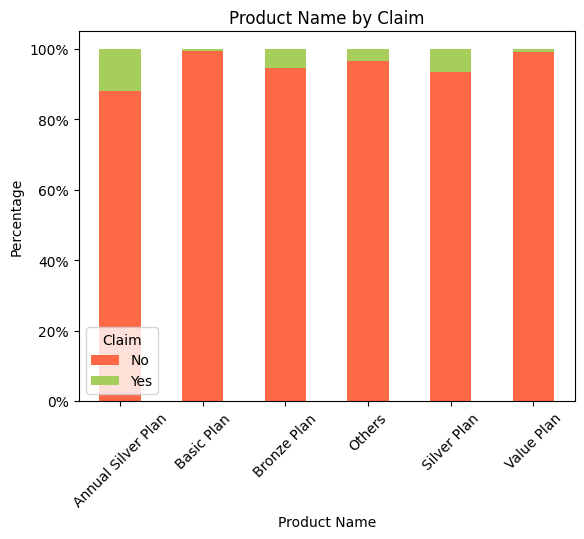

In [ ]:
# Distribution Channel dan Claim

# assign warna (hex code)
colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}

# group data
(data.groupby('Product Name')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=45) # supaya text di x axis tidak miring
plt.title('Product Name by Claim')
plt.xlabel('Product Name')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

Annual Silver Plan menghasilkan claim 'yes' paling banyak, diikuti Silver Plan dan Bronze Plan. Claim 'yes' paling sedikit ada di Basic Plan. Semakin tinggi tingkat product, semakin banyak claim 'yes'

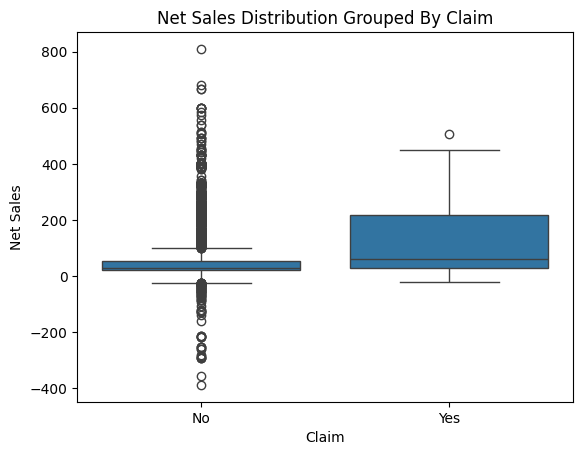

In [ ]:
# Box plot for 'Net Sales' grouped by 'Claim'

sns.boxplot(data=data, x='Claim', y='Net Sales')
plt.title('Net Sales Distribution Grouped By Claim')
plt.show()

Jika klaim 'No' berarti tidak ada kejadian atau event penting yang terjadi, maka asuransi mendapatkan keuntungan karena customer telah membayar tanpa ada pengajuan klaim, sehingga menghasilkan penjualan bersih yang tinggi. Namun, ada kemungkinan penjualan bersih pada klaim 'No' justru di bawah nol atau mengalami kerugian. Hal ini bisa terjadi karena asuransi sengaja menjual polis dengan harga rendah sebagai strategi untuk menarik customer baru. Dalam kasus ini, jika customer masih dalam tahap awal keanggotaannya, asuransi belum mencapai titik profit karena pendapatan premi belum cukup untuk menutup biaya operasional atau promosi awal.


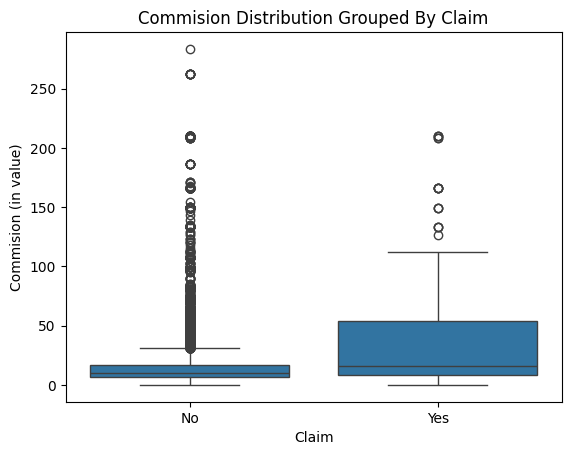

In [ ]:
# Box plot for 'Commision (in value)' grouped by 'Claim'

sns.boxplot(data=data, x='Claim', y='Commision (in value)')
plt.title('Commision Distribution Grouped By Claim')
plt.show()


Claim 'No' komisi tinggi karena asuransi tidak mengeluarkan uang

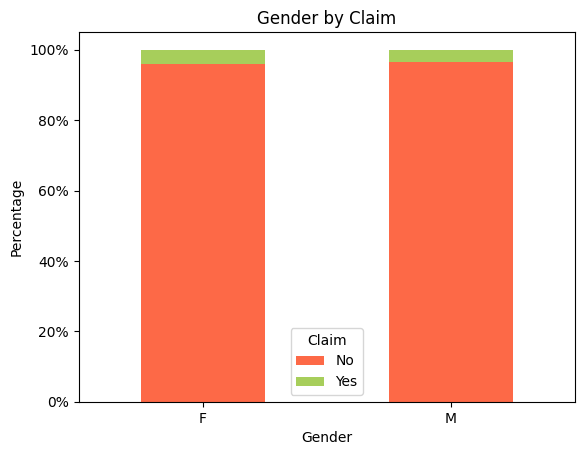

In [ ]:
# Gender dan Claim

# assign warna (hex code)
colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}

# group data
(data.groupby('Gender')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=0) # supaya text di x axis tidak miring
plt.title('Gender by Claim')
plt.xlabel('Gender')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

Tidak ada perbedaan signifikan antara male dan female

## FEATURE ENGINEERING
- Binary Encoding kolom Claim, Gender

In [ ]:
data['Destination'].unique()

array(['MALAYSIA', 'UNITED STATES', 'NORWAY', 'SINGAPORE', 'INDIA',
       'BRUNEI DARUSSALAM', 'AUSTRALIA', 'INDONESIA', 'THAILAND', 'CHINA',
       'PHILIPPINES', 'HONG KONG', 'VIET NAM', 'CAMBODIA', 'AUSTRIA',
       'MYANMAR', 'JAPAN', 'TAIWAN, PROVINCE OF CHINA', 'SRI LANKA',
       'UNITED KINGDOM', 'FRANCE', 'GERMANY', 'NETHERLANDS', 'MACAO',
       'KOREA, REPUBLIC OF', 'UNITED ARAB EMIRATES', 'DENMARK',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'ITALY', 'OMAN', 'NEW ZEALAND',
       'FIJI', 'POLAND', 'NEPAL', 'SPAIN', 'CANADA', 'BRAZIL', 'PORTUGAL',
       'IRELAND', 'NEW CALEDONIA', 'FINLAND', 'SAUDI ARABIA', 'JORDAN',
       'SWEDEN', 'GUINEA', 'TURKEY', 'BANGLADESH', 'MONGOLIA',
       'AZERBAIJAN', 'PAKISTAN', 'MOROCCO', 'SWITZERLAND', 'LITHUANIA',
       'MALI', 'BELGIUM', 'CZECH REPUBLIC', 'HUNGARY', 'PAPUA NEW GUINEA',
       'BAHRAIN', 'KENYA', 'MAURITIUS', 'CYPRUS', 'ANGOLA', 'BELARUS',
       'ESTONIA', 'ARGENTINA', 'NAMIBIA', 'BULGARIA', 'PERU', 'QATAR',
       'IS

In [ ]:
region_mapping = {
    'EAST ASIA': ['CHINA', 'JAPAN', 'TAIWAN, PROVINCE OF CHINA', 'KOREA, REPUBLIC OF', 'HONG KONG', 'MACAO', 'MONGOLIA'],
    'SOUTHEAST ASIA': ['MALAYSIA', 'SINGAPORE', 'BRUNEI DARUSSALAM', 'INDONESIA', 'THAILAND', 'PHILIPPINES', 'VIET NAM', 'CAMBODIA', 'MYANMAR', 'LAO PEOPLE\'S DEMOCRATIC REPUBLIC', 'NEPAL', 'BANGKOK'],
    'SOUTH ASIA': ['INDIA', 'SRI LANKA', 'PAKISTAN', 'BANGLADESH', 'BHUTAN'],
    'MIDDLE EAST': ['UNITED ARAB EMIRATES', 'SAUDI ARABIA', 'OMAN', 'QATAR', 'BAHRAIN', 'JORDAN', 'ISRAEL', 'TURKMENISTAN', 'EGYPT', 'IRAN, ISLAMIC REPUBLIC OF'],
    'EUROPE': ['UNITED KINGDOM', 'FRANCE', 'GERMANY', 'NETHERLANDS', 'AUSTRIA', 'ITALY', 'SWITZERLAND', 'SWEDEN', 'BELGIUM', 'CZECH REPUBLIC', 'HUNGARY', 'POLAND', 'PORTUGAL', 'IRELAND', 'DENMARK', 'FINLAND', 'ESTONIA', 'LATVIA', 'LITHUANIA'],
    'NORTH AMERICA': ['UNITED STATES', 'CANADA'],
    'OCEANIA': ['AUSTRALIA', 'NEW ZEALAND', 'FIJI', 'PAPUA NEW GUINEA'],
    'LATIN AMERICA': ['BRAZIL', 'ARGENTINA', 'MEXICO', 'PERU', 'BOLIVIA', 'CHILE'],
    'AFRICA': ['KENYA', 'MAURITIUS', 'SOUTH AFRICA', 'ANGOLA', 'GUINEA'],
    'OTHERS': ['RUSSIAN FEDERATION', 'AZERBAIJAN', 'BELARUS', 'CYPRUS', 'ESTONIA', 'LATVIA']
}

def categorize_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'OTHERS'

data['Region'] = data['Destination'].apply(categorize_region)
data.drop('Destination', axis=1, inplace=True)
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Gender,Age,Region
0,CBH,Travel Agency,Offline,Others,No,186,-29.0,9.57,F,81,SOUTHEAST ASIA
1,CBH,Travel Agency,Offline,Others,No,186,-29.0,9.57,F,71,SOUTHEAST ASIA
5,JZI,Airlines,Online,Value Plan,No,66,-121.0,42.35,F,44,NORTH AMERICA
11,JZI,Airlines,Online,Basic Plan,No,1,-18.0,6.30,M,47,SOUTHEAST ASIA
12,KML,Travel Agency,Online,Others,No,53,-130.0,49.40,F,48,OTHERS


Code ini untuk maping data negara berdasarkan benua nya.

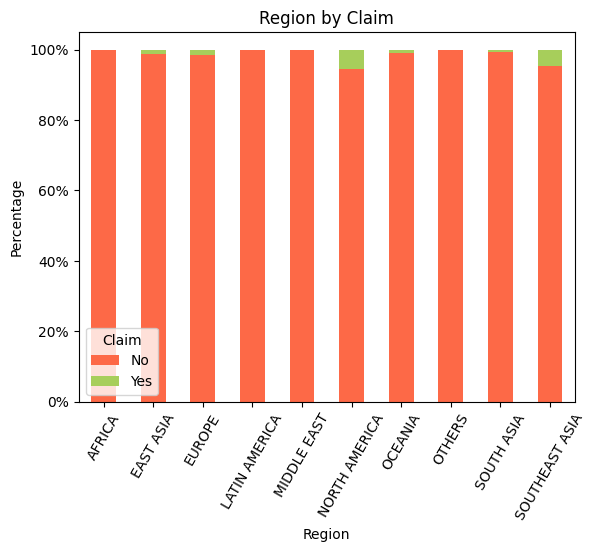

In [ ]:
# Region dan Claim

# assign warna (hex code)
colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}

# group data
(data.groupby('Region')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=60) # supaya text di x axis tidak miring
plt.title('Region by Claim')
plt.xlabel('Region')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

Setelah di maping, dapat dilihat dalam code ini bahwa region "North America" menghasilkan clain "Yes" paling banyak, lalu disusul oleh "Southeast Asia".

In [ ]:
# Drop Column yang tidak signifikan
data.drop(['Agency Type', 'Gender'], axis=1, inplace=True)
data.head()

,Agency,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Region
0,CBH,Offline,Others,No,186,-29.0,9.57,81,SOUTHEAST ASIA
1,CBH,Offline,Others,No,186,-29.0,9.57,71,SOUTHEAST ASIA
5,JZI,Online,Value Plan,No,66,-121.0,42.35,44,NORTH AMERICA
11,JZI,Online,Basic Plan,No,1,-18.0,6.30,47,SOUTHEAST ASIA
12,KML,Online,Others,No,53,-130.0,49.40,48,OTHERS


Code ini melakukan drop pada colom yang tidak signifikan atau menghapus colom yang tidak diperlukan.

In [ ]:
# Binary Encoding Claim menjadi 1 atau 0
data['Claim'] = data['Claim'].replace({'Yes': 1, 'No': 0})
# Binary Encoding Distribution Channel menjadi 1 atau 0
data['Distribution Channel'] = data['Distribution Channel'].replace({'Online': 1, 'Offline': 0})
data.head()

<ipython-input-65-842e709b4c7f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Claim'] = data['Claim'].replace({'Yes': 1, 'No': 0})
<ipython-input-65-842e709b4c7f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Distribution Channel'] = data['Distribution Channel'].replace({'Online': 1, 'Offline': 0})


,Agency,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Region
0,CBH,0,Others,0,186,-29.0,9.57,81,SOUTHEAST ASIA
1,CBH,0,Others,0,186,-29.0,9.57,71,SOUTHEAST ASIA
5,JZI,1,Value Plan,0,66,-121.0,42.35,44,NORTH AMERICA
11,JZI,1,Basic Plan,0,1,-18.0,6.30,47,SOUTHEAST ASIA
12,KML,1,Others,0,53,-130.0,49.40,48,OTHERS


Code ini mengubah data categorical menjadi numeric, contoh nya seperti mengubah data Clain yang tadinya berisikan "Yes" dan "No", menjadi "1" dan "0".

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform = 'pandas')
encoded_job = encoder.fit_transform(data[['Agency']])
data = pd.concat([data, encoded_job.astype('int')],  axis = 1)
data = data.drop(columns = ['Agency'])

encoder = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform = 'pandas')
encoded_job = encoder.fit_transform(data[['Region']])
data = pd.concat([data, encoded_job.astype('int')],  axis = 1)
data = data.drop(columns = ['Region'])

data.head()

,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,...,Agency_TTW,Region_EAST ASIA,Region_EUROPE,Region_LATIN AMERICA,Region_MIDDLE EAST,Region_NORTH AMERICA,Region_OCEANIA,Region_OTHERS,Region_SOUTH ASIA,Region_SOUTHEAST ASIA
0,0,Others,0,186,-29.0,9.57,81,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,Others,0,186,-29.0,9.57,71,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1,Value Plan,0,66,-121.0,42.35,44,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,Basic Plan,0,1,-18.0,6.30,47,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,1,Others,0,53,-130.0,49.40,48,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Code ini memisahkan isi dari "Agency" dan "Region" dengan melakukan one hot encoder dan numeric.

In [ ]:
data['Product Name'].unique()

array(['Others', 'Value Plan', 'Basic Plan', 'Bronze Plan', 'Silver Plan',
       'Annual Silver Plan'], dtype=object)

Code ini digunakan untuk mencari unique value dari kolom **product name**, karena data dalam kolom tersebut bersifat categorical.

In [ ]:
# Label Encoding

# Ganti value 'others' menjadi 0
def encode_product_name(product):
    mapping = {
        'Value Plan': 1,
        'Basic Plan': 2,
        'Bronze Plan': 3,
        'Silver Plan': 4,
        'Annual Silver Plan': 5
    }
    return mapping.get(product, 0)

data['Product Name'] = data['Product Name'].apply(encode_product_name)

data.head()

,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,...,Agency_TTW,Region_EAST ASIA,Region_EUROPE,Region_LATIN AMERICA,Region_MIDDLE EAST,Region_NORTH AMERICA,Region_OCEANIA,Region_OTHERS,Region_SOUTH ASIA,Region_SOUTHEAST ASIA
0,0,0,0,186,-29.0,9.57,81,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,186,-29.0,9.57,71,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1,1,0,66,-121.0,42.35,44,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,2,0,1,-18.0,6.30,47,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,1,0,0,53,-130.0,49.40,48,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Code ini digunakan untuk melakukan Label Encoding pada kolom product name, sehingga data categorical dalam kolom tersebut dapat diubah menjadi numerical.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16959 entries, 0 to 63325
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Distribution Channel   16959 non-null  int64  
 1   Product Name           16959 non-null  int64  
 2   Claim                  16959 non-null  int64  
 3   Duration               16959 non-null  int64  
 4   Net Sales              16959 non-null  float64
 5   Commision (in value)   16959 non-null  float64
 6   Age                    16959 non-null  int64  
 7   Agency_ART             16959 non-null  int64  
 8   Agency_C2B             16959 non-null  int64  
 9   Agency_CBH             16959 non-null  int64  
 10  Agency_CCR             16959 non-null  int64  
 11  Agency_CSR             16959 non-null  int64  
 12  Agency_CWT             16959 non-null  int64  
 13  Agency_JWT             16959 non-null  int64  
 14  Agency_JZI             16959 non-null  int64  
 15  Agency_

Code ini digunakan untuk menampilkan informasi tentang dataset setelah proses **One-Hot Encoding** dan **Label Encoding**, serta memverifikasi bahwa semua kolom dalam dataset telah berhasil diubah menjadi tipe numeric.


# Data Splitting

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Pisahkan input dan output
X = data.drop('Claim', axis=1)
y = data['Claim']

# Terapkan Random Undersampling sebelum split
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Periksa distribusi kelas setelah undersampling
print("Distribusi kelas setelah undersampling:")
print(pd.Series(y_balanced).value_counts())
print("\nDistribusi kelas pada data latih:")
print(pd.Series(y_train).value_counts())
print("\nDistribusi kelas pada data uji:")
print(pd.Series(y_test).value_counts())


Distribusi kelas setelah undersampling:
Claim
0    633
1    633
Name: count, dtype: int64

Distribusi kelas pada data latih:
Claim
0    506
1    506
Name: count, dtype: int64

Distribusi kelas pada data uji:
Claim
0    127
1    127
Name: count, dtype: int64


Code ini menggunakan **Random Undersampling** untuk mengatasi masalah ketidakseimbangan kelas dalam dataset. Dengan melakukan undersampling, distribusi data menjadi lebih seimbang. Hal ini penting agar dapat mempelajari pola kelas dengan adil.  

Setelah melakukan proses undersampling, dengan menggunakna train test split data dibagi menjadi dua set :


*   Train
*   Test

Distribusi kelas pada kedua set diperiksa untuk memastikan keseimbangan diantara setiap kelasnya.

Teknik ini dipilih karena sederhana, cepat dan efisien dari segi komputasi.
Namun, dengan menggunakan random undersampling, informasi penting dari kelas mayoritas bisa saja menghilang.


# SCALING

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Code ini menggunakan **RobustScaler** untuk melakukan **scaling** pada data. **Fit_transform** digunakan untuk menghitung parameter scaling dari data train dan langsung menerapkannya, sedangkan **transform** diterapkan pada data test dengan parameter yang sudah dihitung dari data train. Teknik ini lebih tahan terhadap outlier dibandingkan scaler lainnya, karena menggunakan median dan interkuartil.

# Evaluate Model

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

## Classification Report Models & ROC Curve

In [ ]:
 !pip install catboost
 !pip install dask[dataframe]

Logistic Regression
Accuracy: 0.7401574803149606
Confusion Matrix:
 [[ 73  54]
 [ 12 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.57      0.69       127
           1       0.68      0.91      0.78       127

    accuracy                           0.74       254
   macro avg       0.77      0.74      0.73       254
weighted avg       0.77      0.74      0.73       254

-------------------------
RandomForestClassifier
Accuracy: 0.6929133858267716
Confusion Matrix:
 [[85 42]
 [36 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       127
           1       0.68      0.72      0.70       127

    accuracy                           0.69       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.69      0.69      0.69       254

-------------------------
GradientBoostingClassifier
Accuracy: 0.7322834645669292
Confusion M

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier
Accuracy: 0.7283464566929134
Confusion Matrix:
 [[ 84  43]
 [ 26 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       127
           1       0.70      0.80      0.75       127

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254

-------------------------
ExtraTreesClassifier
Accuracy: 0.6692913385826772
Confusion Matrix:
 [[83 44]
 [40 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       127
           1       0.66      0.69      0.67       127

    accuracy                           0.67       254
   macro avg       0.67      0.67      0.67       254
weighted avg       0.67      0.67      0.67       254

-------------------------
BaggingClassifier
Accuracy: 0.6732283464566929
Confusion Matrix:
 [[87

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


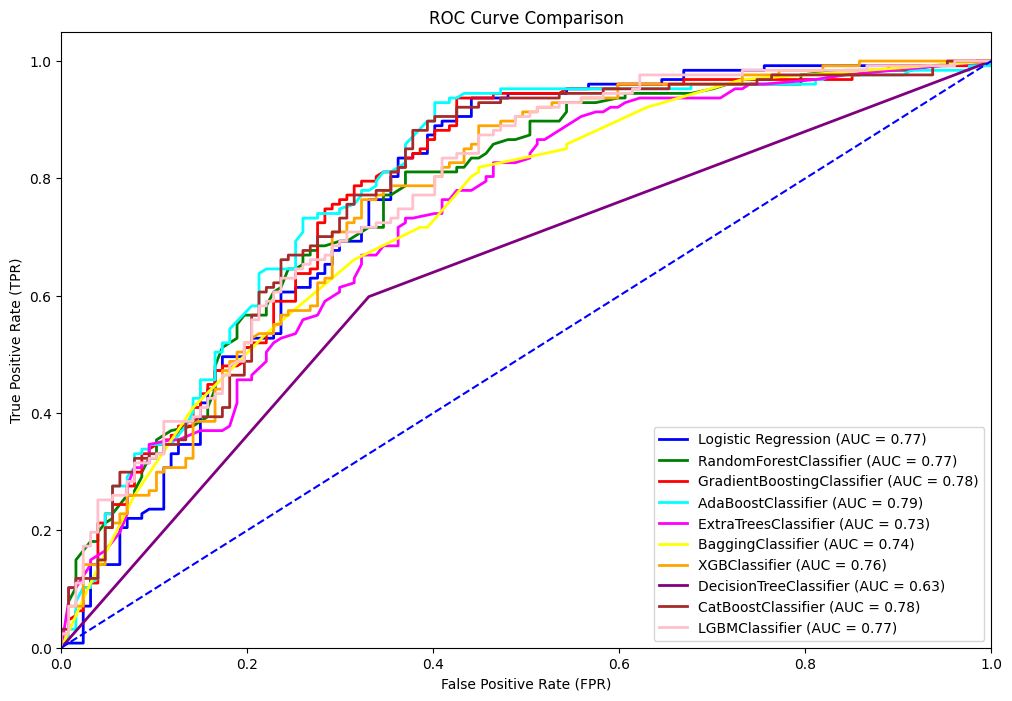

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt



models = {
    'Logistic Regression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(class_weight = 'balanced', random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'BaggingClassifier': BaggingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(class_weight = 'balanced', random_state=0),
    'CatBoostClassifier': CatBoostClassifier(random_state=0, verbose=False),
    'LGBMClassifier': LGBMClassifier(random_state=0, verbose=-1),
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])

    pipeline.fit(x_train, y_train)
    y_pred= pipeline.predict(x_test)

    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print("-------------------------")


# Colors for the plots
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink']

# Train, predict and evaluate each model
plt.figure(figsize=(12, 8))
for (name, model), color in zip(models.items(), colors):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    # Plot ROC curve
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


Best model from classification report


*   **XGBClassifier**  
TN dan TP hampir sama dengan FP dan FN, menunjukkan bahwa tidak ada bias yang signifikan diantara kelas.  
F1 Macro (0.71) yang cukup tinggi menunjukkan keseimbangan yang baik antara precision dan recall, sementara AUC 0.76 menandakan model mampu membedakan kelas dengan baik.

*   **LGBMClassifier**  
Model ini memiliki FP yang rendah dan hampir seimbang antara TN dna TP, yang juga menunjukkan tidak ada bias besar.  
Meskipun F1 Macro (0.70) lebih rendah dibandingkan XGBClassifier, AUC nya sedikit lebih tinggi, menunjukkan performa yang lebih baik dalam membedakan kelas.


***

Best model from ROC Curve Comparison (AUC)


*   **AdaBoostClassifier**  
AdaBoostClassifier unggul dalam AUC (0.79) dan F1 Macro (0.73), menunjukkan performa terbaik dalam hal membedakan kelas dan keseimbangan antara precision dan recall.

*   **CatBoostClassifier**  
CatBoostClassifier memiliki AUC yang sangat baik (0.78), meskipun sedikit lebih rendah dibandingkan AdaBoostClassifier, tetapi memiliki F1 Macro yang sebanding dengan XGBClassifier (0.71), yang menunjukkan keseimbangan yang baik dalam menilai kedua kelas.

***
**CatBoostClassifier** dipilih sebagai model terbaik berdasarkan gabungan antara F1 Macro dan AUC. Memiliki F1 Macro yang sebanding dengan model lain, namun AUC cukup tinggi, memberikan keseimbangan yang baik antara **precision**, **recall**, dan kemampuan membedakan kelas.  
Meskipun **AdaBoostClassifier** memiliki AUC tertinggi, **CatBoostClassifier** lebih konsisten dengan keseimbangan antara **F1 Macro** dan **AUC**, menjadikannya pilihan terbaik.

## FINE TUNING

Note : scoring pake f1_macro

Dalam fine-tuning model, penggunaan **F1 Macro** penting karena menggabungkan precision dan recall, memberikan gambaran akurat pada dataset yang tidak seimbang. Precision tinggi menunjukkan sedikit **False Positives (FP)**, artinya prediksi positif cenderung benar. Sebaliknya, recall tinggi tanpa precision yang seimbang menunjukkan banyak FP, di mana model sering salah memprediksi kelas negatif sebagai positif. Oleh karena itu, menjaga FP serendah mungkin menjadi kunci utama untuk meningkatkan precision dan memastikan prediksi positif akurat, yang pada akhirnya meningkatkan F1 Macro secara keseluruhan.



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Inisialisasi model AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=42)

# Step 2: Fit model dengan data latih
ada_model.fit(x_train, y_train)

# Step 3: Prediksi dan evaluasi
y_pred_ada = ada_model.predict(x_test)
print("AdaBoostClassifier - Default Parameters")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print(f'Classification Report:\n{classification_report(y_test, y_pred_ada)}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier - Default Parameters
Accuracy: 0.7283464566929134
Confusion Matrix:
 [[ 84  43]
 [ 26 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       127
           1       0.70      0.80      0.75       127

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254



### Grid Search Ada Boost

In [ ]:
# Step 4: Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],      # Jumlah tree
    'learning_rate': [0.01, 0.1, 1, 10]
}

grid_search_ada = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',  # Sesuai kebutuhan evaluasi
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search_ada.fit(x_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search_ada.best_params_)
print("Best Score:", grid_search_ada.best_score_)

# Gunakan model terbaik untuk prediksi
best_ada_model = grid_search_ada.best_estimator_
y_pred_best_ada = best_ada_model.predict(x_test)

# Evaluasi model terbaik
print("\nBest AdaBoostClassifier")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_ada))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_ada))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': 1, 'n_estimators': 50}
Best Score: 0.7110641549013151

Best AdaBoostClassifier
Confusion Matrix:
[[ 84  43]
 [ 26 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       127
           1       0.70      0.80      0.75       127

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254



setelah di fine tuning, hasil akurasi, F1-Score macro, precision 0, precision 1, recall 0, recall 1, F1-Score 0, F1-Score 1, tidak memiliki perubahan saat menggunakan AdaBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Inisialisasi dan training model CatBoostClassifier
cat_model = CatBoostClassifier(random_state=42, verbose=0)  # Nonaktifkan output training
cat_model.fit(x_train, y_train)

# Step 2: Prediksi dan evaluasi
y_pred_cat = cat_model.predict(x_test)

print("CatBoostClassifier - Default Parameters")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))


CatBoostClassifier - Default Parameters
Accuracy: 71.65%
Confusion Matrix:
 [[83 44]
 [28 99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       127
           1       0.69      0.78      0.73       127

    accuracy                           0.72       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.72      0.72      0.72       254



### Grid Search CatBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Step 1: Definisikan parameter grid untuk tuning
param_grid = {
    'iterations': [100, 200, 300],       # Jumlah iterasi
    'learning_rate': [0.01, 0.1, 0.2],  # Kecepatan pembelajaran
    'depth': [4, 6, 8],                 # Kedalaman pohon
    'l2_leaf_reg': [1, 3, 5],           # Regularisasi L2
}

# Step 2: GridSearchCV
grid_search_cat = GridSearchCV(
    estimator=CatBoostClassifier(random_state=42, verbose=0),
    param_grid=param_grid,
    scoring='f1_macro',  # Sesuaikan metrik evaluasi
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Step 3: Latih GridSearch
grid_search_cat.fit(x_train, y_train)

# Step 4: Hasil tuning
print("Best Parameters:", grid_search_cat.best_params_)
print("Best Score:", grid_search_cat.best_score_)

# Step 5: Gunakan model terbaik untuk prediksi
best_cat_model = grid_search_cat.best_estimator_
y_pred_best_cat = best_cat_model.predict(x_test)

# Evaluasi model terbaik
print("\nBest CatBoostClassifier")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_cat))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_cat))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Best Score: 0.7172243697847888

Best CatBoostClassifier
Confusion Matrix:
[[ 84  43]
 [ 23 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       127
           1       0.71      0.82      0.76       127

    accuracy                           0.74       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.75      0.74      0.74       254



Setelah dilakukan **Fine-tuning**, akurasi dan F1-Score mengalami peningkatan:  


*   **Akurasi** meningkat dari 72% menjadi 74%
*   **F1-Score macro** juga mnegalami kenaikan dari 72% menjadi 74%
***
**Class 0:**  


*   **Precision** mengalami kenaikan dari 75% menjadi 79% yang artinya Precision dari Class 0 menjadi lebih baik setelah di Fine Tuning, dan Class 0 memiliki clasifikasi yang benar sebanyak 79%.

*   **Recall** mengalami kenaikan dari 65% menjadi 66% yang artinya Recall dari Class 0 menjadi lebih baik setelah di Fine Tuning, dan Class 0 memiliki prediksi benar sebanyak 66%.

* **F1-Score** mengalami kenaikan dari 70% menjadi 74% yang artinya F1-Score dari Class 0 menjadi lebih baik setelah di Fine Tuning, dan F1-Score Class 0 sudah cukup seimbang tapi menjadi yang terburuk.
***
**Class 1**

*   **Precision** mengalami kenaikan dari 69% menjadi 71% yang artinya Precision dari Class 1 menjadi lebih baik setelah di Fine Tuning, dan Class 1 memiliki clasifikasi yang benar sebanyak 71%.

*   **Recall** mengalami kenaikan dari 78% menjadi 82% yang artinya Recall dari Class 1 menjadi lebih baik setelah di Fine Tuning, dan Class 1 memiliki prediksi benar sebanyak 82%.

* **F1-Score** mengalami kenaikan dari 73% menjadi 76% yang artinya F1-Score dari Class 1 menjadi lebih baik setelah di Fine Tuning, dan F1-Score Class 1 sudah cukup seimbang dan menjadi yang terbaik.







### Grid Search XBGClassifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# parameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    # 'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Inisialisasi GridSearchCV untuk XGBoost
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit grid search ke data
grid_search_xgb.fit(x_train, y_train)

# Cetak parameter terbaik dan hasil terbaik
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

# Step 5: Gunakan model terbaik untuk prediksi
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(x_test)

# Evaluasi model terbaik
print("\nBest XGBClassifier")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'colsample_bytree': 0.6, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Score: 0.7017776883261

Best XGBClassifier
Confusion Matrix:
[[81 46]
 [28 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       127
           1       0.68      0.78      0.73       127

    accuracy                           0.71       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.71      0.71      0.71       254



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:44:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Setelah dilakukan **Fine-Tuning**,  
Akurasi f1-score dan f1-score macro tidak memiliki kenaikan.
***

**Class 0**

*   **Precision** mengalami kenaikan dari 71% menjadi 74% yang artinya Precision dari Class 0 menjadi lebih baik setelah di Fine Tuning, dan Class 0 memiliki clasifikasi yang benar sebanyak 74%.

*   **Recall** mengalami penurunan dari 71% menjadi 64% yang artinya Recall dari Class 0 menjadi lebih buruk setelah di Fine Tuning, dan Class 0 memiliki prediksi benar sebanyak 64%.

* **F1-Score** mengalami penurunan dari 71% menjadi 69% yang artinya F1-Score dari Class 0 menjadi lebih buruk setelah di Fine Tuning, dan F1-Score Class 0 sudah cukup seimbang tapi menjadi yang terburuk.
***

**Class 1**

*   **Precision** mengalami penurunan dari 71% menjadi 68% yang artinya Precision dari Class 1 menjadi lebih buruk setelah di Fine Tuning, dan Class 1 memiliki clasifikasi yang benar sebanyak 68%.

*   **Recall** mengalami kenaikan dari 71% menjadi 78% yang artinya Recall dari Class 1 menjadi lebih baik setelah di Fine Tuning, dan Class 1 memiliki prediksi benar sebanyak 78%.

* **F1-Score** mengalami kenaikan dari 71% menjadi 73% yang artinya F1-Score dari Class 1 menjadi lebih baik setelah di Fine Tuning, dan F1-Score Class 1 sudah cukup seimbang dan menjadi yang terbaik.


### Grid Search LGBM

In [ ]:
lgbm_model = LGBMClassifier()

# Definisikan parameter grid untuk LightGBM
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'num_leaves': [31, 50, 70]
}

# Inisialisasi GridSearchCV untuk LightGBM
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid_lgbm,
    scoring='f1_macro',  # Ubah scoring sesuai kebutuhan
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit grid search ke data
grid_search_lgbm.fit(x_train, y_train)

# Print parameter terbaik dan hasil terbaik
print("Best Parameters for LGBMClassifier:", grid_search_lgbm.best_params_)
print("Best Score for LGBMClassifier:", grid_search_lgbm.best_score_)


# Gunakan model terbaik untuk prediksi
best_lgbm_model = grid_search_lgbm.best_estimator_
y_pred_best_lgbm = best_lgbm_model.predict(x_test)

# Evaluasi model terbaik
print("\nBest XGBClassifier")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_lgbm))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_lgbm))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for LGBMClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 31, 'subsample': 0.6}
Best Score for LGBMClassifier: 0.7171771698113563

Best XGBClassifier
Confusion Matrix:
[[ 82  45]
 [ 26 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       127
           1       0.69      0.80      0.74       127

    accuracy                           0.72       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.73      0.72      0.72       254



Setelah dilakukan **Fine-tuning**, akurasi dan F1-Score mengalami peningkatan:  


*   **Akurasi** meningkat dari 70% menjadi 72%
*   **F1-Score macro** juga mnegalami kenaikan dari 70% menjadi 72%
***
**Class 0**

*   **Precision** mengalami kenaikan dari 69% menjadi 76% yang artinya Precision dari Class 0 menjadi lebih baik setelah di Fine Tuning, dan Class 0 memiliki clasifikasi yang benar sebanyak 76%.

*   **Recall** mengalami penurunan dari 71% menjadi 65% yang artinya Recall dari Class 0 menjadi lebih buruk setelah di Fine Tuning, dan Class 0 memiliki prediksi benar sebanyak 65%.

* **F1-Score** tidak mengalami perubahan dan tetap menjadi 70% yang artinya F1-Score tidak mengalami perubahan setelah di Fine Tuning, dan F1-Score Class 0 sudah cukup seimbang tapi menjadi yang terburuk.
***
**Class 1**

*   **Precision** mengalami penurunan dari 70% menjadi 69% yang artinya Precision dari Class 1 menjadi lebih buruk setelah di Fine Tuning, dan Class 1 memiliki clasifikasi yang benar sebanyak 69%.

*   **Recall** mengalami kenaikan dari 69% menjadi 80% yang artinya Recall dari Class 1 menjadi lebih baik setelah di Fine Tuning, dan Class 1 memiliki prediksi benar sebanyak 80%.

* **F1-Score** mengalami kenaikan dari 69% menjadi 74% yang artinya F1-Score dari Class 1 menjadi lebih baik setelah di Fine Tuning, dan F1-Score Class 1 sudah cukup seimbang dan menjadi yang terbaik.


**KESIMPULAN**
CatBoost merupakan model terbaik di dataset ini, karena perubahan yang terjadi menjadi lebih baik.